In [1]:
import brian2 as b2
import matplotlib.pyplot as plt
from neurodynex3.cable_equation import passive_cable
from neurodynex3.tools import input_factory

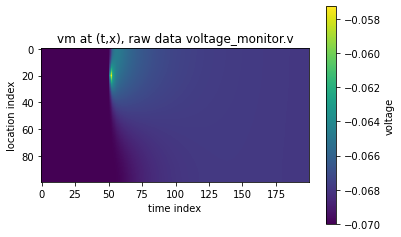

In [3]:
passive_cable.getting_started()

- above: short pulse current input into a finite length cable, then lets Brian evolve the dynamics for 2ms. 
- produces a time x location matrix whose entries are the membrane voltage at ach (time,space) index.   

In [19]:
# default parameters
CURRENT_INJECTION_LOCATION = [166.66666667 * b2.umetre]

CABLE_LENGTH = 500. * b2.um  # length of dendrite
CABLE_DIAMETER = 2. * b2.um  # diameter of dendrite
R_LONGITUDINAL = 0.5 * b2.kohm * b2.mm  # Intracellular medium resistance
R_TRANSVERSAL = 1.25 * b2.Mohm * b2.mm ** 2  # cell membrane resistance (->leak current)
E_LEAK = -70. * b2.mV  # reversal potential of the leak current (-> resting potential)

INITIAL_VOLTAGE=-70. * b2.mvolt,

CAPACITANCE = 0.8 * b2.uF / b2.cm ** 2  # membrane capacitance
NR_COMPARTMENTS = 200

In [87]:
input_current = input_factory.get_step_current(t_start=1000,
                                               t_end=1100, 
                                               unit_time=1.*b2.us, 
                                               amplitude=0.8*b2.namp)

sim_time = 3*b2.ms


## 5.1. Exercise: Spatial and temporal evolution of a pulse input

for each time i, for each compartment j, you need all vm[compartment i].v[time j]    
--> 2D spectrogram is the way to go

- cable length 800um, 0.1ms step current amp 0.8nAmp, at t=1ms,x=200um

In [88]:
vm, cm = passive_cable.simulate_passive_cable(
    current_injection_location=[200*b2.um],
    input_current=input_current,
    length=CABLE_LENGTH,
    diameter=CABLE_DIAMETER,
    r_longitudinal=R_LONGITUDINAL,
    r_transversal=R_TRANSVERSAL,
    e_leak=E_LEAK,
    initial_voltage=INITIAL_VOLTAGE,
    capacitance=CAPACITANCE,
    nr_compartments=NR_COMPARTMENTS,
    simulation_time=sim_time)



v = vm[cm.morphology[200*b2.um]].v

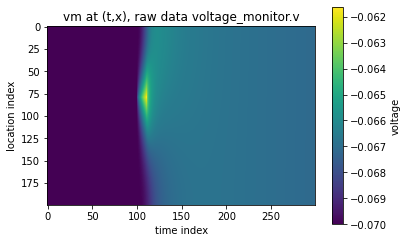

In [92]:
# should divide my mV?
plt.figure()
plt.imshow(vm.v / b2.volt)
plt.colorbar(label="voltage")
plt.xlabel("time index")
plt.ylabel("location index")
plt.title("vm at (t,x), raw data voltage_monitor.v")
plt.show()


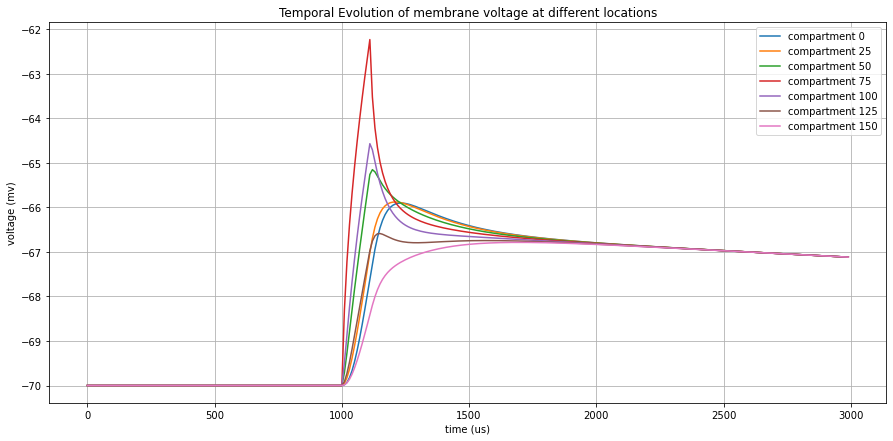

In [124]:
# temporal evolution
indices = [0, 25, 50, 75, 100, 125, 150]


fig = plt.figure(figsize=(15,7))
for i in indices:
    plt.plot( vm.t/b2.us, vm[i].v/b2.mvolt, label = "compartment "+str(i))
plt.legend()
plt.grid()
plt.xlabel("time (us)")
plt.ylabel("voltage (mv)")
plt.title("Temporal Evolution of membrane voltage at different locations")
plt.show()

In [129]:
len(vm.v)

200

In [133]:
len(vm[0].v)

300

In [141]:
len(vm.v[0])

300

In [143]:
vm.v[0][299]

-67.11558 * mvolt

In [146]:
vm.v[199][299]

-67.11590606 * mvolt

In [127]:
len(vm.t)

300

In [ ]:
0 to 3
0 to 300

In [ ]:
1.1 1.2 1.3 1.4 1.5 1.6

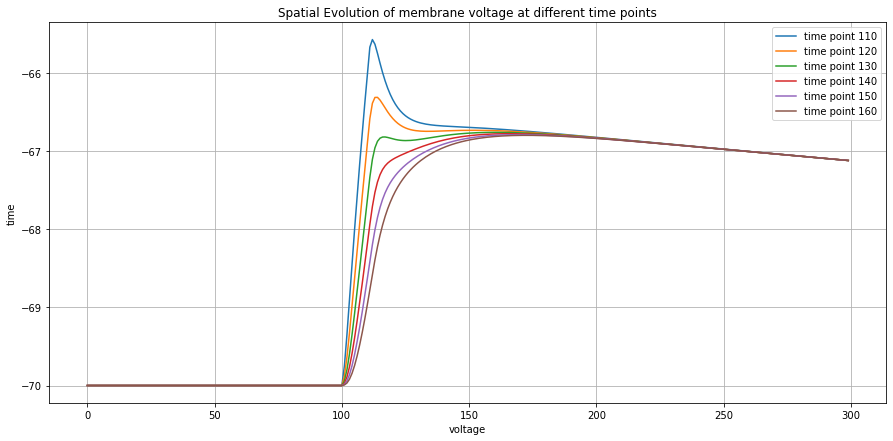

In [149]:
# spatial evolution
indices = [110, 120, 130, 140, 150, 160]

fig = plt.figure(figsize=(15,7))
for i in indices:
    plt.plot(vm.v[:][i]/b2.mvolt, label = "time point "+str(i))
plt.legend()
plt.grid()
plt.xlabel("voltage")
plt.ylabel("time")
plt.title("Spatial Evolution of membrane voltage at different time points")
plt.show()

### 5.1.1. Questions:
- max depolarization? 
    - a bit after stimulation start, around 75th compartment --> 75/200 * 800um = 300um
    

In [32]:
v

AttributeError: 'Quantity' object has no attribute 'imshow'